In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(budworm)

In [3]:
str(budworm)

'data.frame':	12 obs. of  4 variables:
 $ Killed: int  1 4 9 13 18 20 0 2 6 10 ...
 $ Number: int  20 20 20 20 20 20 20 20 20 20 ...
 $ Dose  : int  1 2 4 8 16 32 1 2 4 8 ...
 $ Gender: Factor w/ 2 levels "F","M": 2 2 2 2 2 2 1 1 1 1 ...


In [4]:
budworm

Killed,Number,Dose,Gender
1,20,1,M
4,20,2,M
9,20,4,M
13,20,8,M
18,20,16,M
20,20,32,M
0,20,1,F
2,20,2,F
6,20,4,F
10,20,8,F


In [11]:
budworm$Prop = budworm$Killed/budworm$Number

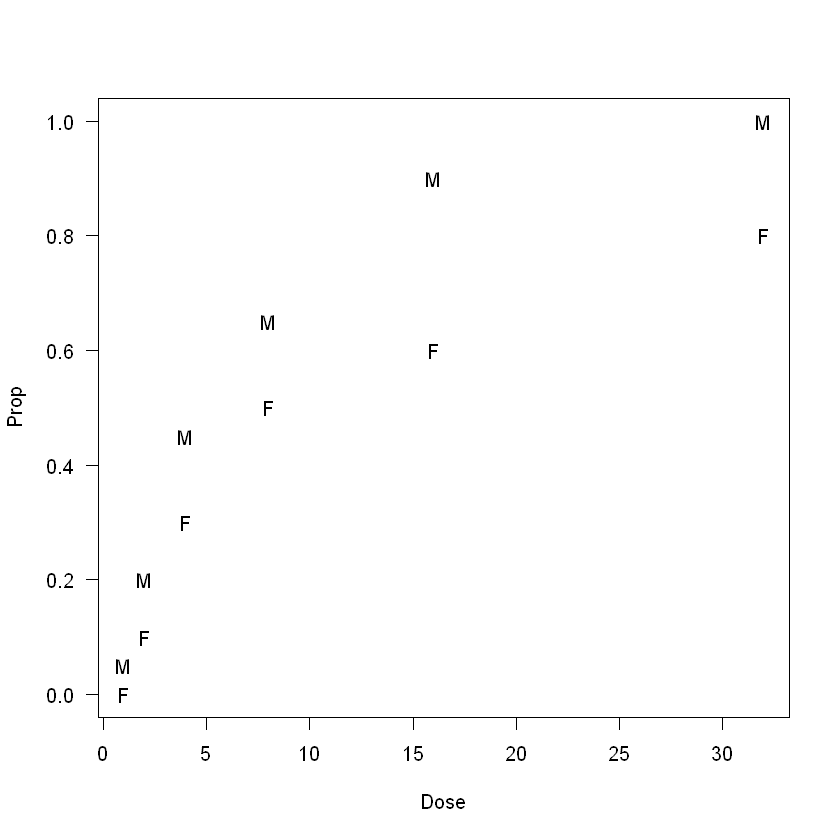

In [22]:
plot(Prop ~ Dose, data=budworm, type="n", las=1)
points( Prop ~ Dose, pch="M", subset=(Gender=="M"), data=budworm)
points( Prop ~ Dose, pch="F", subset=(Gender=="F"), data=budworm)


In [27]:
glm.1 <- glm(Killed/Number ~ log2(Dose)*Gender, data=budworm, weights=Number, family = binomial(link="logit"))

In [28]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-2.9935418,0.5526997,-5.4162175,6.087304e-08
log2(Dose),0.9060364,0.1671016,5.4220678,5.891353e-08
GenderM,0.1749868,0.7783100,0.2248292,8.221122e-01
log2(Dose):GenderM,0.3529130,0.2699902,1.3071324,1.911678e-01


In [29]:
anova(glm.1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,11,124.875593,NA
log2(Dose),1,107.891560,10,16.984033,2.838937e-25
Gender,1,10.226968,9,6.757064,1.384020e-03
log2(Dose):Gender,1,1.763337,8,4.993727,1.842088e-01


In [30]:
glm.2 <- glm(Killed/Number ~ log2(Dose) + Gender, data=budworm, weights=Number, family = binomial(link="logit"))

In [31]:
coef(summary(glm.2))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.473155,0.4685202,-7.413032,1.234445e-13
log2(Dose),1.064214,0.1310775,8.118971,4.701542e-16
GenderM,1.100743,0.3558271,3.093478,1.978249e-03


In [32]:
anova(glm.2, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,11,124.875593,NA
log2(Dose),1,107.89156,10,16.984033,2.838937e-25
Gender,1,10.22697,9,6.757064,1.384020e-03


In [35]:
newDose = seq(min(budworm$Dose), max(budworm$Dose), length=100)
fit.male <- predict(glm.2, newdata=data.frame(Dose=newDose, Gender="M"), se.fit=TRUE, type="response")
fit.female <- predict(glm.2, newdata=data.frame(Dose=newDose, Gender="F"), se.fit=TRUE, type="response")


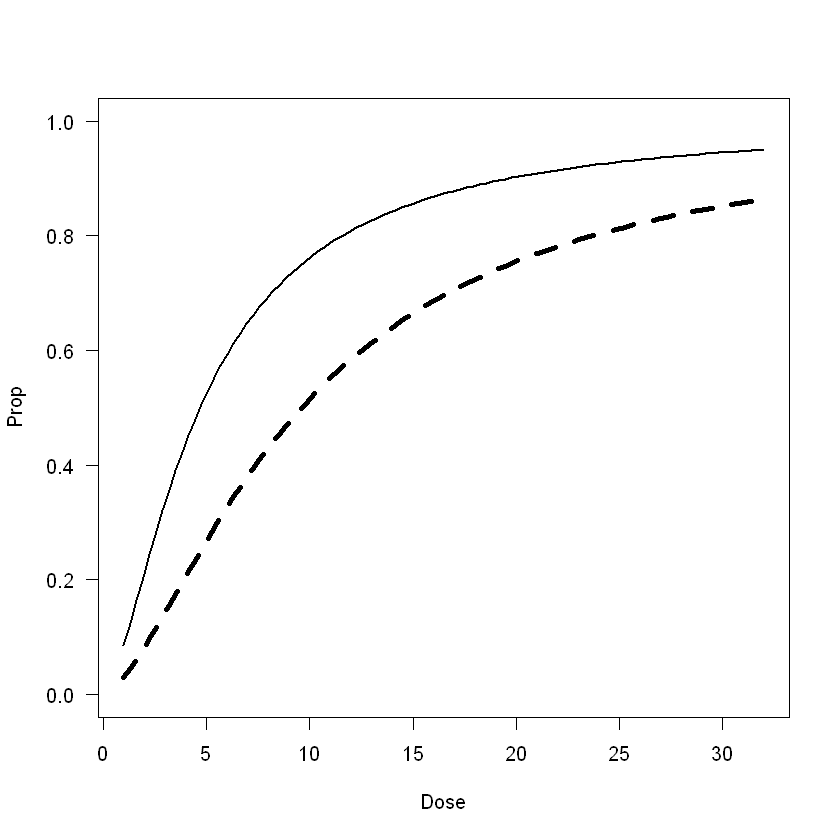

In [36]:
plot(Prop ~ Dose, data=budworm, type="n", las=1, pch=ifelse(Gender=="M", 1, 19))
lines(fit.male$fit ~ newDose, lty=1, lwd=2)
lines(fit.female$fit ~ newDose, lty=2, lwd=4)


In [39]:
exp(coef(summary(glm.2))[3,"Estimate"])
exp(1.100743)

[1] 3.0064

[1] 3.006399

In [37]:
dose.p(glm.2, c(1, 2))
dose.p(glm.2, c(1, 3))

             Dose        SE
p = 0.5: 3.263587 0.2297539

             Dose        SE
p = 0.5: 3.155282 0.8409467

In [40]:
confint(glm.2)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-4.4581438,-2.613610
log2(Dose),0.8228708,1.339058
GenderM,0.4192265,1.820471



	Shapiro-Wilk normality test

data:  qresid(glm.2)
W = 0.94887, p-value = 0.6205


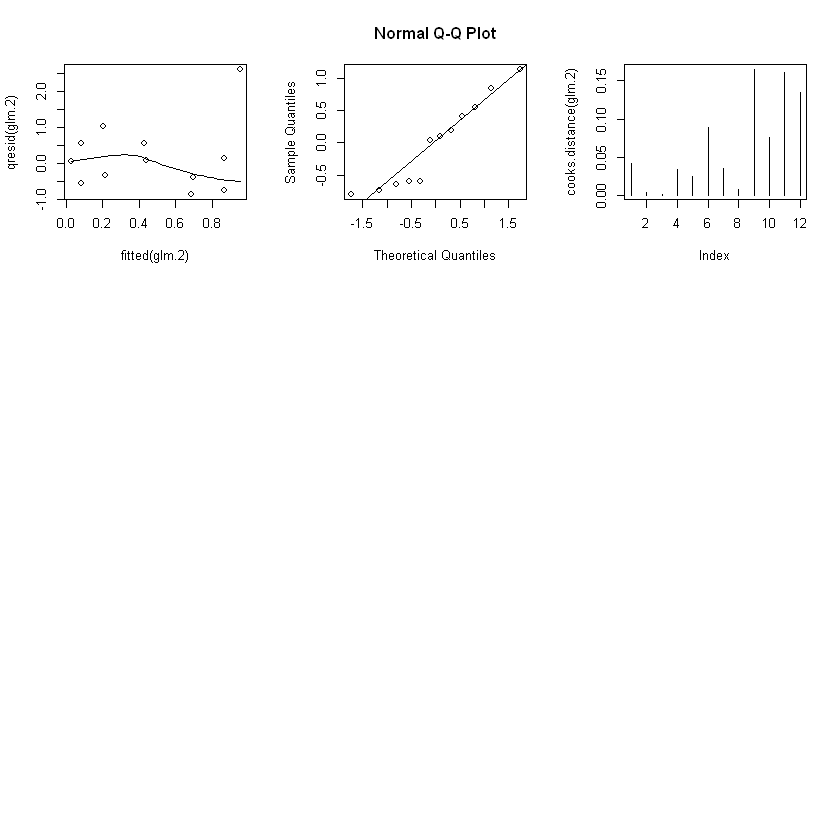

In [41]:
par(mfrow=c(3, 3))

scatter.smooth(qresid(glm.2) ~ fitted(glm.2))
#termplot(glm.2, partial.resid = TRUE, las=2)
#scatter.smooth(glm.2$linear.predictor + resid(glm.2, type="working") ~ glm.2$linear.predictor)
qqnorm(qresid(glm.2))
qqline(qresid(glm.2))
plot(cooks.distance(glm.2), type="h")
shapiro.test(qresid(glm.2))

In [42]:
colSums(influence.measures(glm.2)$is.inf)

dfb.1_ dfb.l2(D dfb.GndM    dffit    cov.r   cook.d      hat 
       0        0        0        0        0        0        0

In [43]:
rowSums(influence.measures(glm.2)$is.inf)

1  2  3  4  5  6  7  8  9 10 11 12 
 0  0  0  0  0  0  0  0  0  0  0  0